In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sglm.data_helpers

# Import Data

Inputted CSV data should conform to the following convention:

Indices / Unique Row Identifiers:
* File ID -- Any order is acceptable
* Trial ID -- Must be in chronological order, but does not need to start from zero
* TimeStamp ID -- Must be in chronological order, but does not need to start from zero

Columns (Predictors + Responses + Miscelaneous Information):
* Predictors
* Reponses
* Miscelaneous Information

Example:
| id_session | id_trial | id_timestamp | predictor_1 | predictor_2 | predictor_3 | response_1 | response_2 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| session_0 | trial_0 | -1 | 0 | 0 | 0 | 1 | 0.3 |
| session_0 | trial_0 | 0 | 0 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_0 | 1 | 0 | 0 | 0 | 1 | 2.3 |
| session_0 | trial_0 | 2 | 0 | 1 | 0 | 1 | 0.3 |
| session_0 | trial_1 | -2 | 0 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_1 | -1 | 0 | 0 | 0 | 1 | 2.3 |
| session_0 | trial_1 | 0 | 1 | 0 | 0 | 0 | 1.4 |
| session_0 | trial_1 | 1 | 0 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_0 | 5 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_0 | 6 | 1 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_0 | 7 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_0 | 8 | 0 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_1 | 9 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_1 | 10 | 0 | 0 | 0 | 1 | 2.3 |
| session_1 | trial_1 | 11 | 0 | 0 | 1 | 0 | 1.4 |
| session_1 | trial_1 | 12 | 0 | 0 | 0 | 0 | 2.3 |
| session_1 | trial_2 | 13 | 0 | 0 | 0 | 0 | 1.4 |
| session_1 | trial_2 | 14 | 0 | 0 | 0 | 0 | 2.3 |
| session_1 | trial_2 | 15 | 0 | 1 | 0 | 0 | 1.4 |
| session_1 | trial_2 | 16 | 0 | 0 | 0 | 1 | 2.3 |

# Import Your Data Here (Or Use the Above Example)

In [2]:
df_example = pd.DataFrame({
    'id_session': [ 'session_0',  'session_0',  'session_0',  'session_0',  'session_0',  'session_0',  'session_0',  'session_0',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',  'session_1',],
    'id_trial': ['trial_0', 'trial_0', 'trial_0', 'trial_0', 'trial_1', 'trial_1', 'trial_1', 'trial_1', 'trial_0', 'trial_0', 'trial_0', 'trial_0', 'trial_1', 'trial_1', 'trial_1', 'trial_1', 'trial_2', 'trial_2', 'trial_2', 'trial_2',],
    'id_timestamp': [-1, 0, 1, 2, -2, -1, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'predictor_1': [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0],
    'predictor_2': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'predictor_3': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    'response_1': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1 ,0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    'response_2': [0.3, 1.4, 2.3, 0.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3, 1.4, 2.3,],
}, ).set_index(['id_session', 'id_trial', 'id_timestamp'])
df_example

predictor_1  predictor_2  predictor_3  \
id_session id_trial id_timestamp                                          
session_0  trial_0  -1                      0            0            0   
                     0                      0            0            0   
                     1                      0            0            0   
                     2                      0            1            0   
           trial_1  -2                      0            0            0   
                    -1                      0            0            0   
                     0                      1            0            0   
                     1                      0            0            0   
session_1  trial_0   5                      0            0            0   
                     6                      1            0            0   
                     7                      0            0            0   
                     8                      0            0            0   
           trial_1   9                      0            0            0   
                     10                     0            0            1   
                     11                     0            0            0   
                     12                     0            0            0   
           trial_2   13                     0            1            0   
                     14                     0            0            0   
                     15                     0            0            1   
                     16                     0            0            0   

                                  response_1  response_2  
id_session id_trial id_timestamp                          
session_0  trial_0  -1                     1         0.3  
                     0                     0         1.4  
                     1                     1         2.3  
                     2                     1         0.3  
           trial_1  -2                     0         1.4  
                    -1                     1         2.3  
                     0                     0         1.4  
                     1                     1         2.3  
session_1  trial_0   5                     0         1.4  
                     6                     1         2.3  
                     7                     0         1.4  
                     8                     1         2.3  
           trial_1   9                     0         1.4  
                     10                    1         2.3  
                     11                    0         1.4  
                     12                    0         2.3  
           trial_2   13                    0         1.4  
                     14                    0         2.3  
                     15                    0         1.4  
                     16                    0         2.3

In [3]:
df_source = df_example.copy() # Comment Out to Switch to Your Data
# df_source = pd.read_csv('path/to/dataframe.csv', index_col=['id_file', 'id_trial', 'id_timestamp']) # Uncomment to Use Your Data

# Define or Load Parameters Dictionary

In [96]:
parameters_glm_fit = {
    'predictors': [
        'cue',
        'predictor_2',
        'predictor_3',
        ],
    'predictors_shift_bounds_default': (-1, 1), # Default Shift Bounds for All Predictors Unspecified in 'predictors_shift_bounds'
    'predictors_shift_bounds': { # 
        'predictor_1': (-2, 2),
        'predictor_2': (-2, 0),
    },
    'response': 'rDA',
    'glm_keyword_arguments': {
        'C': 1e-6,
        'solver': 'lbfgs',
        # 'alpha': 0,
        # 'l1_ratio': 0,
        'max_iter': 10000,
    }
}
# TODO: JZ: Add Importing for Parameters

# BERNARDO
# Add a column for trues / falses
# Add the option to shift forward/backward the true/false


In [97]:
list_predictors_and_shifts = [(predictor,parameters_glm_fit['predictors_shift_bounds'].get(predictor, parameters_glm_fit['predictors_shift_bounds_default'])) for predictor in parameters_glm_fit['predictors']]
list_predictors_shifted = []
for predictor, predictor_shift_bounds in list_predictors_and_shifts:
    predictor_shifted = sglm.data_helpers.shift_series_range(
        df_source[predictor],
        predictor_shift_bounds,
        shift_bounding_column=['id_session']
    )
    list_predictors_shifted.append(predictor_shifted)
df_predictors_shifted = pd.concat(list_predictors_shifted, axis=1)
srs_response = df_source[parameters_glm_fit['response']]

In [98]:
non_nans = (df_predictors_shifted.isna().sum(axis=1) == 0)&~np.isnan(srs_response)
df_predictors_fit = df_predictors_shifted[non_nans].copy()
srs_response_fit = srs_response[non_nans].copy()

In [99]:
# TODO: JZ: Implement Train/Validation/Test Splitting

# Fit GLM Model

In [101]:
import sglm.fit_helpers

glm_model = sglm.fit_helpers.fit_GLM(df_predictors_fit, srs_response_fit, model_name='Logistic', **parameters_glm_fit['glm_keyword_arguments'])

Text(0.5, 1.0, 'GLM Coefficients Fit Results — Response: response_1')

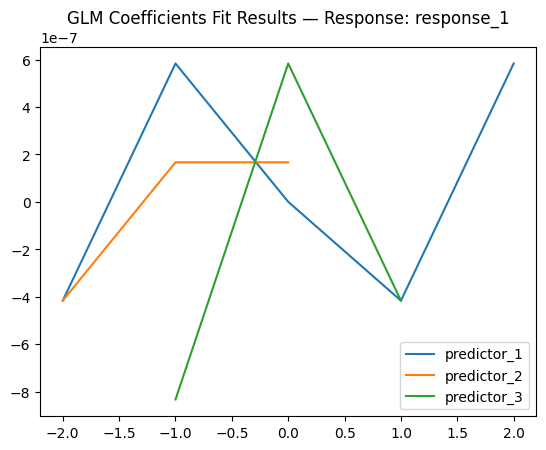

In [102]:
model_fit_results = pd.Series(glm_model.coef_[0], index=df_predictors_fit.columns, name='coef').unstack(0)
model_fit_results.index = model_fit_results.index.astype(int)
axes = model_fit_results.sort_index().plot()
axes.set_title(f'GLM Coefficients Fit Results — Response: {parameters_glm_fit["response"]}')